### This notebook is created for users to be able to use the tool easily without running the backend code. However we request you to please check out the Functions.ipynb and Sample_Use.ipynb to get an idea on the total range of outputs. We also have an Accessing_and_Visualising.ipynb to access and visualise the downloaded data from this notebook.

#### Currently the run-times are high since all the computation is done on the spot. However, we are working towards reducing these drastically and this will be updated soon . 
####  We have also made the back-end code available and users are free to fork the repo and make desired changes in the code for their own purposes

## Please ignore the code, just run the cells and select the values from the dropdowns generated

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display , HTML , clear_output


from Functions import shapefile_generator
from Functions import graph_plotter_cropland 
from Functions import graph_plotter_marginal
from Functions import graph_plotter_all
from Functions import bokeh_plot , crop_show

In [2]:
import re

# Function to sanitize the key for NetCDF variable names
def sanitize_key(key):
    # Replace any non-alphanumeric characters with underscores
    key = re.sub(r'[^a-zA-Z0-9_]', '_', key)
    return key

## Select Geography (Country and Province)  

### Simply run the cell , scroll to the drop down box, select your desired geography and press confirm.

### Remark : Choose None in Province if you want for the whole country

In [6]:
# Load data
geography_df = pd.read_csv('dataset/Countries&Provinces.csv')

# Get unique countries and provinces
countries = geography_df['NAME_0'].unique()
provinces = geography_df['NAME_1'].unique()

# Create dropdown widgets
country_dropdown = widgets.Dropdown(options=countries, description='Country:')
province_dropdown = widgets.Dropdown(description='Province:')
confirm_button = widgets.Button(description='Confirm Selection')

# Global variables to store selected values
selected_country = countries[0]
selected_province = provinces[0]
geography = None  # Initialize geography as None

def update_provinces(change):
    global selected_country
    selected_country = change.new
    filtered_provinces = geography_df[geography_df['NAME_0'] == selected_country]['NAME_1'].unique()

    # Add an empty option to reselect or select a new province
    province_dropdown.options = [None] + filtered_provinces.tolist()

    # Set the value to the first province in the list, or 'Select Province' if the list is empty
    province_dropdown.value = filtered_provinces[0] if filtered_provinces.any() else 'Select Province'

# Attach the update_provinces function to the country dropdown's 'value' trait
country_dropdown.observe(update_provinces, names='value')

# Function to display selected values
def on_confirm_button_click(button):
    global selected_province, geography
    clear_output(wait=True)  # Clear the output area before displaying new values

    country_value = f"<b>Selected Country:</b> {selected_country}"

    if province_dropdown.value and province_dropdown.value != 'Select Province':
        selected_province = province_dropdown.value
        province_value = f"<b>Selected Province:</b> {selected_province}"
        
        # Run the shapefile_generator code and assign the result to the global variable
        geography = shapefile_generator(selected_country, selected_province)
        
        # Additional code if needed
        
        # Display a message to indicate success
        print("Geography selected successfully!")
    else:
        selected_province = None
        province_value = "<b>Selected Province:</b> None"
        geography = shapefile_generator(selected_country)

    display(HTML(f"{country_value}<br>{province_value}"))

# Attach the on_confirm_button_click function to the button's 'on_click' event
confirm_button.on_click(on_confirm_button_click)

# Style dropdown options with HTML formatting
country_dropdown.style.description_width = 'initial'
country_dropdown.style.description_color = 'black'
country_dropdown.style.font_weight = 'bold'
province_dropdown.style.description_width = 'initial'
province_dropdown.style.description_color = 'black'
province_dropdown.style.font_weight = 'bold'

# Display the widgets
display(widgets.HBox([country_dropdown, province_dropdown, confirm_button]))

### Simply run the cell , scroll to the dropdowns, select your desired climate model, irrigation conditions and Input Level and press confirm.

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import plotly.graph_objects as go
import numpy as np

# Climate models options
climate_models = ['GFDL-ESM2M', 'HadGEM2-ES', 'NorESM1-M', 'MIROC-ESM-CHEM', 'IPSL-CM5A-LR']

# Water supply future options
water_supply_future = ['Available water content of 200 mm/m (under irrigation conditions)',
                       'Available water content of 200 mm/m (under rain-fed conditions)']

# Input level options
input_levels = ['High']

# Global variables to store selected values
selected_climate_model = 'GFDL-ESM2M'
selected_water_supply = 'Available water content of 200 mm/m (under irrigation conditions)'
selected_input_level = 'High'
selected_water_supply_2010 = 'Total'  # New variable for the year 2010

# Function to update selected climate model
def update_climate_model(change):
    global selected_climate_model
    selected_climate_model = change.new

# Function to update selected water supply future
def update_water_supply(change):
    global selected_water_supply
    selected_water_supply = change.new

# Function to update selected input level
def update_input_level(change):
    global selected_input_level
    selected_input_level = change.new

# Function to update selected water supply in 2010
def update_water_supply_2010(change):
    global selected_water_supply_2010
    selected_water_supply_2010 = change.new

# Function to display selected values
def on_confirm_button_click(button):
    clear_output(wait=True)  # Clear the output area before displaying new values

    climate_model_value = f"<b>Selected Climate Model:</b> {selected_climate_model}"
    water_supply_value = f"<b>Selected Water Supply Future:</b> {selected_water_supply}"
    input_level_value = f"<b>Selected Input Level:</b> {selected_input_level}"
    water_supply_2010_value = f"<b>Selected Water Supply in 2010:</b> {selected_water_supply_2010}"

    display(HTML(f"{climate_model_value}<br>{water_supply_value}<br>{input_level_value}<br>{water_supply_2010_value}"))

# Create dropdown widgets for climate models, water supply future, and input level
climate_model_dropdown = widgets.Dropdown(options=climate_models, value=selected_climate_model, description='Climate Model:')
water_supply_dropdown = widgets.Dropdown(options=water_supply_future, value=selected_water_supply, description='Water Supply Future:')
input_level_dropdown = widgets.Dropdown(options=input_levels, value=selected_input_level, description='Input Level:')
water_supply_2010_dropdown = widgets.Dropdown(options=['Total', 'Irrigated', 'Rainfed'], value=selected_water_supply_2010, description='Water Supply in 2010:')

# Create a button for confirmation
confirm_button = widgets.Button(description='Confirm Selection')

# Attach the update functions to the dropdowns' 'value' trait
climate_model_dropdown.observe(update_climate_model, names='value')
water_supply_dropdown.observe(update_water_supply, names='value')
input_level_dropdown.observe(update_input_level, names='value')
water_supply_2010_dropdown.observe(update_water_supply_2010, names='value')

# Attach the on_confirm_button_click function to the button's 'on_click' event
confirm_button.on_click(on_confirm_button_click)

# Style dropdown options with HTML formatting
climate_model_dropdown.style.description_width = 'initial'
climate_model_dropdown.style.description_color = 'black'
climate_model_dropdown.style.font_weight = 'bold'
water_supply_dropdown.style.description_width = 'initial'
water_supply_dropdown.style.description_color = 'black'
water_supply_dropdown.style.font_weight = 'bold'
input_level_dropdown.style.description_width = 'initial'
input_level_dropdown.style.description_color = 'black'
input_level_dropdown.style.font_weight = 'bold'
water_supply_2010_dropdown.style.description_width = 'initial'
water_supply_2010_dropdown.style.description_color = 'black'
water_supply_2010_dropdown.style.font_weight = 'bold'

# Display the widgets in two rows
display(widgets.HBox([climate_model_dropdown, water_supply_dropdown]))
display(widgets.HBox([input_level_dropdown, water_supply_2010_dropdown, confirm_button]))


### Simply run the following cells and then click on Run. Wait for the code to run and the graphs to appear, then select the RCP and Time-period for whcih you want to download the data. Click Download and the xarrays generated will be downloaded as NetCDF4 files. 

###  Cropland data

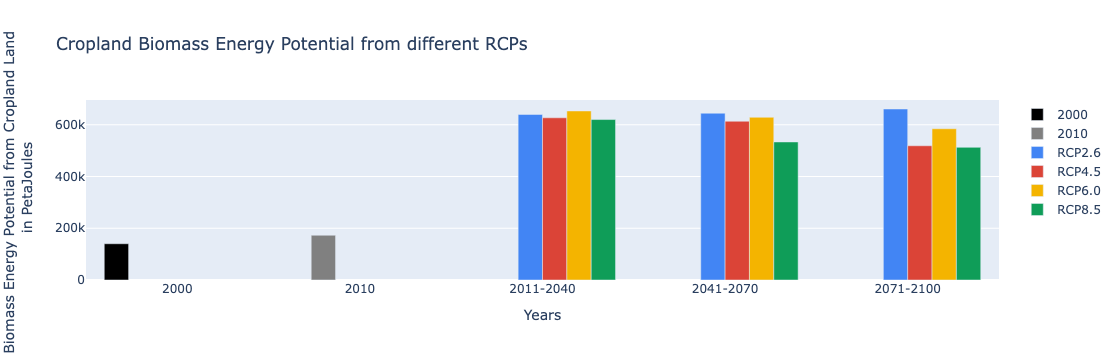

Dropdown(description='RCP:', options=('RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5'), value='RCP2.6')

Dropdown(description='Time Period:', options=('2011-2040', '2041-2070', '2071-2100'), value='2011-2040')

Button(description='Download NetCDF4', style=ButtonStyle())

In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a button to run the code
run_button = widgets.Button(description='Run')

# Create a button to download xarrays as NetCDF4
download_nc_button = widgets.Button(description='Download NetCDF4')

# Create dropdown widgets for RCP and time period
rcp_dropdown = widgets.Dropdown(options=['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5'], value='RCP2.6', description='RCP:')
time_period_dropdown = widgets.Dropdown(options=['2011-2040', '2041-2070', '2071-2100'], value='2011-2040', description='Time Period:')

# Function to run the code on button click
def on_run_button_click(button):
    clear_output(wait=True)  # Clear the output area before running the code
    global fig_crop, xarrays_crop
    fig_crop, xarrays_crop = graph_plotter_cropland(shapefile=geography, climate_model=selected_climate_model,
                                          water_supply_future=selected_water_supply, input_level=selected_input_level)
    
    
    # Display the dropdowns after the graph is loaded
    display(rcp_dropdown)
    display(time_period_dropdown)
    
    # Display the "Download NetCDF4" button after the graph is loaded
    display(download_nc_button)

# Attach the on_run_button_click function to the button's 'on_click' event
run_button.on_click(on_run_button_click)

# Function to download xarrays as NetCDF4 on button click
def on_download_nc_button_click(button):
    if xarrays_crop:
        # Get the selected RCP and time period from the dropdowns
        selected_rcp = rcp_dropdown.value
        selected_time_period = time_period_dropdown.value

        try:
            # Access the selected xarray using the selected RCP and time period
            selected_xarray = xarrays_crop[(selected_rcp, selected_time_period)]

            # Save the selected xarray as a NetCDF4 file
            selected_xarray.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_cropland_data.nc')
            print('NetCDF4 file downloaded successfully.')
        except Exception as e:
            print(f'Error creating dataset: {e}')
    else:
        print('No xarrays available. Please run the code first.')

# Attach the on_download_nc_button_click function to the button's 'on_click' event
download_nc_button.on_click(on_download_nc_button_click)

# Display the "Run" button initially
display(run_button)


### Marginal Land Data

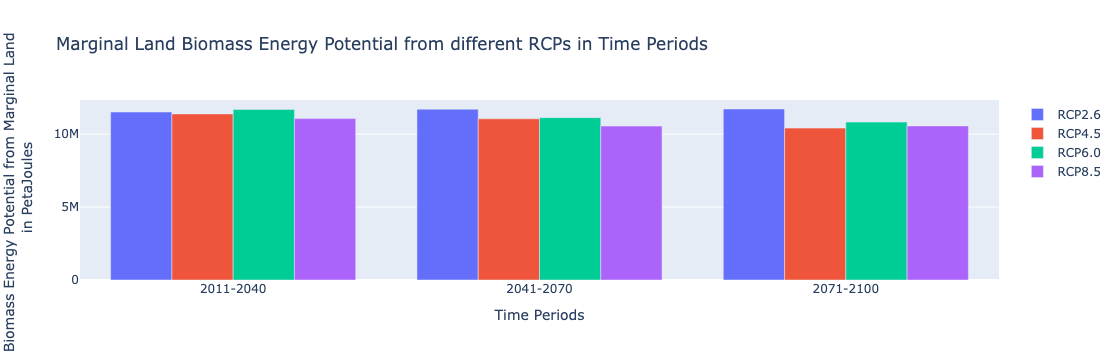

Dropdown(description='RCP:', options=('RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5'), value='RCP2.6')

Dropdown(description='Time Period:', options=('2011-2040', '2041-2070', '2071-2100'), value='2011-2040')

Button(description='Download NetCDF4', style=ButtonStyle())

In [9]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Create a button to run the code
run_button = widgets.Button(description='Run')

# Create a button to download xarrays as NetCDF4
download_nc_button = widgets.Button(description='Download NetCDF4')

# Create dropdown widgets for RCP and time period
rcp_dropdown = widgets.Dropdown(options=['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5'], value='RCP2.6', description='RCP:')
time_period_dropdown = widgets.Dropdown(options=['2011-2040', '2041-2070', '2071-2100'], value='2011-2040', description='Time Period:')

# Function to run the code on button click
def on_run_button_click(button):
    clear_output(wait=True)  # Clear the output area before running the code
    global fig_marg, xarrays_marg , final_potentials_marg
    fig_marg, xarrays_marg , final_potentials_marg = graph_plotter_marginal(shapefile=geography, climate_model=selected_climate_model,
                                          water_supply_future=selected_water_supply, input_level=selected_input_level)
    
    
    # Display the dropdowns after the graph is loaded
    display(rcp_dropdown)
    display(time_period_dropdown)
    
    # Display the "Download NetCDF4" button after the graph is loaded
    display(download_nc_button)

# Attach the on_run_button_click function to the button's 'on_click' event
run_button.on_click(on_run_button_click)

# Function to download xarrays as NetCDF4 on button click
def on_download_nc_button_click(button):
    if xarrays_marg:
        # Get the selected RCP and time period from the dropdowns
        selected_rcp = rcp_dropdown.value
        selected_time_period = time_period_dropdown.value

        try:
            # Access the selected xarray using the selected RCP and time period
            selected_xarray = xarrays_marg[(selected_rcp, selected_time_period)]
            selected_final_potentials = final_potentials_marg[(selected_rcp, selected_time_period)]
            
            # Drop the first dimension from selected_final_potentials and select the coords and dims
            coords = {'latitude': selected_xarray['latitude'], 'longitude': selected_xarray['longitude']}
            selected_final_potentials = selected_final_potentials[0]
            
           # Create a new xarray dataset with the same dimensions and coordinates
            xarray_final_potentials= xr.DataArray(data=selected_final_potentials, dims=('y', 'x'), coords=coords , name='final_energy_potential')

            # Save the selected xarray as a NetCDF4 file
            selected_xarray.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_marginal_land_data.nc')
            
            # Save the new xarray dataset as a NetCDF4 file
            xarray_final_potentials.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_marginal_land_final_energy_potential_data.nc', 'w')
            
        except Exception as e:
            print(f'Error creating dataset: {e}')
    else:
        print('No xarrays available. Please run the code first.')

# Attach the on_download_nc_button_click function to the button's 'on_click' event
download_nc_button.on_click(on_download_nc_button_click)

# Display the "Run" button initially
display(run_button)


### Cropland , Marginal and Total Land Data

In [7]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.graph_objects as go
import numpy as np
import xarray as xr

# Create a button to run the code
run_button_all = widgets.Button(description='Run All')

# Create a button to download xarrays as NetCDF4
download_nc_button_all = widgets.Button(description='Download NetCDF4')

# Create dropdown widgets for RCP and time period
rcp_dropdown_all = widgets.Dropdown(options=['RCP2.6', 'RCP4.5', 'RCP6.0', 'RCP8.5'], value='RCP2.6', description='RCP:')
time_period_dropdown_all = widgets.Dropdown(options=['2011-2040', '2041-2070', '2071-2100'], value='2011-2040', description='Time Period:')

# Function to run the code on button click
def on_run_button_all_click(button):
    clear_output(wait=True)  # Clear the output area before running the code
    global fig_crop_all, fig_marg_all, fig_total_all, xarrays_marg_all, xarrays_crop_all, final_potentials_marg_all, arrays_total_all
    fig_crop_all, fig_marg_all, fig_total_all, xarrays_marg_all, xarrays_crop_all, final_potentials_marg_all, arrays_total_all = graph_plotter_all(
        shapefile=geography, climate_model=selected_climate_model,
        water_supply_future=selected_water_supply, input_level=selected_input_level, water_supply_2010=selected_water_supply_2010
    )

    # Display the dropdowns after the graphs are loaded
    display(rcp_dropdown_all)
    display(time_period_dropdown_all)

    # Display the "Download NetCDF4" button after the graphs are loaded
    display(download_nc_button_all)

# Attach the on_run_button_all_click function to the button's 'on_click' event
run_button_all.on_click(on_run_button_all_click)

# Function to download xarrays as NetCDF4 on button click
def on_download_nc_button_all_click(button):
    if xarrays_crop_all and xarrays_marg_all and arrays_total_all: # and final_potentials_marg_all:
        # Get the selected RCP and time period from the dropdowns
        selected_rcp = rcp_dropdown_all.value
        selected_time_period = time_period_dropdown_all.value

        try:
            # Choose the xarray based on the selected RCP and time period
            selected_xarray_crop = xarrays_crop_all.get((selected_rcp, selected_time_period))
            selected_xarray_marg = xarrays_marg_all.get((selected_rcp, selected_time_period))
            selected_array_total = arrays_total_all.get((selected_rcp, selected_time_period))
            selected_final_potentials_marg = final_potentials_marg_all.get(((selected_rcp, selected_time_period)))

            if selected_xarray_crop is not None:
                selected_xarray_crop.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_cropland.nc')
                print('NetCDF4 file for cropland downloaded successfully.')
            if selected_xarray_marg is not None:
                selected_xarray_marg.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_marginal.nc')
                print('NetCDF4 file for marginal land downloaded successfully.')
                
            if selected_final_potentials_marg is not None: 
                # Drop the first dimension from selected_final_potentials and select the coords and dims
                coords = {'latitude': selected_xarray_crop['latitude'], 'longitude': selected_xarray_crop['longitude']}
                selected_final_potentials_marg = selected_final_potentials_marg[0]
            
               # Create a new xarray dataset with the same dimensions and coordinates
                xarray_final_potentials_marg= xr.DataArray(data=selected_final_potentials_marg, dims=('y', 'x'), coords=coords , name='final_energy_potential_marg')
                xarray_final_potentials_marg.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_marginal_land_final_energy_potential_data.nc', 'w')
                
            if selected_array_total is not None:
                # Drop the first dimension from selected_final_potentials and select the coords and dims
                coords = {'latitude': selected_xarray_crop['latitude'], 'longitude': selected_xarray_crop['longitude']}
                selected_array_total = selected_array_total[0] if selected_array_total.ndim == 3 else selected_array_total
            
               # Create a new xarray dataset with the same dimensions and coordinates
                xarray_total= xr.DataArray(data=selected_array_total, dims=('y', 'x'), coords=coords , name='total_energy_potential')
                xarray_total.to_netcdf(f'{selected_country}_{selected_province}_{selected_rcp}_{selected_time_period}_marginal_land_final_energy_potential_data.nc', 'w')
                print('NetCDF4 file for total land downloaded successfully.')
                
        except Exception as e:
            print(f'Error creating dataset: {e}')
    else:
        print('No xarrays available. Please run the code first.')

# Attach the on_download_nc_button_all_click function to the button's 'on_click' event
download_nc_button_all.on_click(on_download_nc_button_all_click)

# Display the "Run All" button initially
display(run_button_all)

Button(description='Run All', style=ButtonStyle())